In [125]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plt.style.use('ggplot')
sns.set_style('whitegrid')
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [126]:
#Load dataset
df1= pd.read_csv("Breastc.csv")
df= pd.read_csv("Breastc.csv")
SS =pd.read_csv("Breastc.csv")

df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [127]:
#dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   T Stage                 4024 non-null   object
 2   N Stage                 4024 non-null   object
 3   6th Stage               4024 non-null   object
 4   differentiate           4024 non-null   object
 5   Grade                   4024 non-null   object
 6   A Stage                 4024 non-null   object
 7   Tumor Size              4024 non-null   int64 
 8   Estrogen Status         4024 non-null   object
 9   Progesterone Status     4024 non-null   object
 10  Regional Node Examined  4024 non-null   int64 
 11  Regional Node Positive  4024 non-null   int64 
 12  Survival Months         4024 non-null   int64 
 13  Status                  4024 non-null   object
dtypes: int64(5), object(9)
memory usage: 440.2+ KB


In [128]:
result = df.groupby('Status').agg({'Status': 'count'})
result

,Status
Status,
Alive,3408
Dead,616


In [129]:
print(f' the Indext befor is  :  {df.columns}')

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
Index =df.columns
print(f' the Indext after is  :  {df.columns}')

 the Indext befor is  :  Index(['Age', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade',
       'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Regional Node Positive', 'Survival Months',
       'Status'],
      dtype='object')
 the Indext after is  :  Index(['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'differentiate', 'Grade',
       'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
       'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months',
       'Status'],
      dtype='object')


In [130]:
#number of null value
dataFrram = pd.DataFrame(df.isna().sum() )
dataFrram

,0
Age,0
T_Stage,0
N_Stage,0
6th_Stage,0
differentiate,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0
Progesterone_Status,0


In [131]:
#Data Analysis
# A simple statistical study on digital data
pd.set_option('display.float_format', '{:.1f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,54.0,9.0,30.0,47.0,54.0,61.0,69.0
Tumor_Size,4024.0,30.5,21.1,1.0,16.0,25.0,38.0,140.0
Regional_Node_Examined,4024.0,14.4,8.1,1.0,9.0,14.0,19.0,61.0
Regional_Node_Positive,4024.0,4.2,5.1,1.0,1.0,2.0,5.0,46.0
Survival_Months,4024.0,71.3,22.9,1.0,56.0,73.0,90.0,107.0


In [132]:
# all columns
Index

Index(['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'differentiate', 'Grade',
       'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
       'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months',
       'Status'],
      dtype='object')

In [133]:
# Numerical variables:
num_cols =[ 'Age' , 'Tumor_Size' , 'Regional_Node_Examined' ,'Regional_Node_Positive' ,'Survival_Months' ]

# Categorical variables:
cat_cols =[ 'T_Stage', 'N_Stage', '6th_Stage','differentiate', 'Grade', 'A_Stage','Estrogen_Status' ,'Progesterone_Status', 
           'Status']

In [134]:
# Now we visualize the values that each categorical variable takes.
print('=====*'*10+'\n')
print(f"Total Categorical Variables = {len(cat_cols)} \n")
print("=====*"*10+'\n\n\n' )
i=1
for cat_col in cat_cols:
    print(f"{i}-  {cat_col} ==> {df[cat_col].unique()} ==> {df[cat_col].nunique()} unique values \n\n")
    i=i+1

=====*=====*=====*=====*=====*=====*=====*=====*=====*=====*

Total Categorical Variables = 9 

=====*=====*=====*=====*=====*=====*=====*=====*=====*=====*



1-  T_Stage ==> ['T1' 'T2' 'T3' 'T4'] ==> 4 unique values 


2-  N_Stage ==> ['N1' 'N2' 'N3'] ==> 3 unique values 


3-  6th_Stage ==> ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB'] ==> 5 unique values 


4-  differentiate ==> ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated'] ==> 4 unique values 


5-  Grade ==> ['3' '2' '1' ' anaplastic; Grade IV'] ==> 4 unique values 


6-  A_Stage ==> ['Regional' 'Distant'] ==> 2 unique values 


7-  Estrogen_Status ==> ['Positive' 'Negative'] ==> 2 unique values 


8-  Progesterone_Status ==> ['Positive' 'Negative'] ==> 2 unique values 


9-  Status ==> ['Alive' 'Dead'] ==> 2 unique values 




In [135]:
# Now we visualize the numeric variables.
print("=="*30+'\n')
print(f"Total Numerical Variables = {len(num_cols)} \n")
print("=="*30+'\n\n')
i=1
for num_col in num_cols:
    print(f"{i} {num_col}  The value ranges between [ {df[num_col].min()} ,{df[num_col].max()}] \n\n")
    i=i+1


Total Numerical Variables = 5 



1 Age  The value ranges between [ 30 ,69] 


2 Tumor_Size  The value ranges between [ 1 ,140] 


3 Regional_Node_Examined  The value ranges between [ 1 ,61] 


4 Regional_Node_Positive  The value ranges between [ 1 ,46] 


5 Survival_Months  The value ranges between [ 1 ,107] 




In [136]:
print(f'There are {df.duplicated().sum()} duplicate rows')

There are 1 duplicate rows


In [137]:
SS = df.copy()
for i in cat_cols :
    SS[i],l =pd.factorize(df[i])

In [138]:
#Correlation Coefficient
#It is a statistical measure that quantifies the strength and direction of a linear relationship between two variables.
Correlation = SS.corr()
Correlation=pd.DataFrame(np.array(Correlation))
print('Correlation')
Correlation

Correlation


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,-0.1,0.0,-0.0,0.1,0.1,-0.0,-0.1,-0.1,0.0,-0.0,0.0,-0.0,0.1
1,-0.1,1.0,0.3,0.6,-0.1,-0.1,0.2,0.8,0.1,0.1,0.1,0.2,-0.1,0.2
2,0.0,0.3,1.0,0.1,-0.1,-0.1,0.3,0.3,0.1,0.1,0.3,0.8,-0.1,0.3
3,-0.0,0.6,0.1,1.0,-0.1,-0.1,0.1,0.3,0.0,0.0,0.1,0.1,-0.1,0.1
4,0.1,-0.1,-0.1,-0.1,1.0,1.0,-0.0,-0.1,-0.2,-0.2,-0.1,-0.1,0.1,-0.1
5,0.1,-0.1,-0.1,-0.1,1.0,1.0,-0.0,-0.1,-0.2,-0.2,-0.1,-0.1,0.1,-0.1
6,-0.0,0.2,0.3,0.1,-0.0,-0.0,1.0,0.1,0.1,0.0,0.1,0.2,-0.1,0.1
7,-0.1,0.8,0.3,0.3,-0.1,-0.1,0.1,1.0,0.1,0.1,0.1,0.2,-0.1,0.1
8,-0.1,0.1,0.1,0.0,-0.2,-0.2,0.1,0.1,1.0,0.5,0.0,0.1,-0.1,0.2
9,0.0,0.1,0.1,0.0,-0.2,-0.2,0.0,0.1,0.5,1.0,0.0,0.1,-0.1,0.2


In [139]:
#Euclidean Distance
#It is a measure in geometry that calculates the straight-line distance between two points in a multi-dimensional space.
def euclidean1(arr1,arr2):
    return np.linalg.norm(arr1-arr2)
data = np.array(SS)  
distances = np.zeros((15, 15))
for i in range(15):
    for j in range(15):
        distances[i, j] =euclidean1(data[i:i+1], data[j:j+1])

distances_euclidean = pd.DataFrame(distances) 
distances_euclidean

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,37.5,62.9,36.8,48.6,37.7,22.8,61.8,104.9,44.3,18.0,68.7,33.5,32.3,35.5
1,37.5,0.0,32.0,31.7,18.2,31.4,28.7,49.8,70.7,37.1,29.3,38.9,16.5,32.7,15.3
2,62.9,32.0,0.0,48.0,37.3,46.3,59.8,72.1,45.9,38.1,52.9,22.0,34.9,62.1,31.2
3,36.8,31.7,48.0,0.0,42.6,18.4,33.7,73.7,91.5,29.8,24.0,44.5,35.5,52.0,32.9
4,48.6,18.2,37.3,42.6,0.0,47.1,34.7,38.8,69.9,52.8,38.3,46.5,22.4,35.5,28.3
5,37.7,31.4,46.3,18.4,47.1,0.0,37.7,77.1,87.5,24.6,32.3,40.2,39.3,51.9,33.6
6,22.8,28.7,59.8,33.7,34.7,37.7,0.0,47.1,99.0,50.8,20.5,63.9,30.9,22.4,34.0
7,61.8,49.8,72.1,73.7,38.8,77.1,47.1,0.0,94.3,84.9,59.9,83.5,49.4,33.3,56.9
8,104.9,70.7,45.9,91.5,69.9,87.5,99.0,94.3,0.0,80.1,96.7,52.6,75.7,94.7,72.0
9,44.3,37.1,38.1,29.8,52.8,24.6,50.8,84.9,80.1,0.0,37.8,38.2,38.5,60.8,29.6


In [140]:
#Cosine similarity
#Cosine similarity is a measure used to determine the cosine of the angle between two non-zero vectors in a multi-dimensional space.
def cosine_similarity(arr1,arr2):
    x = np.sum(np.multiply(arr1,arr2))
    y = np.linalg.norm(arr1)
    z = np.linalg.norm(arr2)
    return x / (y*z)
data = np.array(SS)  
distances = np.zeros((15,15))
for i in range(15):
    for j in range(15):
        distances[i, j] =cosine_similarity(data[i:i+1], data[j:j+1])

distances_cosine = pd.DataFrame(distances) 
distances_cosine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.9,0.8,0.9,0.9,0.9,1.0,0.8,0.6,0.9,1.0,0.8,0.9,1.0,0.9
1,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,1.0,1.0,1.0,0.9,1.0
2,0.8,1.0,1.0,0.9,1.0,0.9,0.9,0.9,0.9,1.0,0.9,1.0,1.0,0.9,1.0
3,0.9,1.0,0.9,1.0,0.9,1.0,1.0,0.7,0.7,1.0,1.0,0.9,0.9,0.9,0.9
4,0.9,1.0,1.0,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.9,1.0,1.0,0.9,1.0
5,0.9,1.0,0.9,1.0,0.9,1.0,1.0,0.7,0.8,1.0,1.0,0.9,0.9,0.9,0.9
6,1.0,1.0,0.9,1.0,0.9,1.0,1.0,0.8,0.7,1.0,1.0,0.9,1.0,1.0,1.0
7,0.8,0.9,0.9,0.7,0.9,0.7,0.8,1.0,0.8,0.8,0.8,0.8,0.9,0.9,0.9
8,0.6,0.9,0.9,0.7,0.9,0.8,0.7,0.8,1.0,0.8,0.7,0.9,0.8,0.7,0.9
9,0.9,1.0,1.0,1.0,0.9,1.0,1.0,0.8,0.8,1.0,1.0,1.0,1.0,1.0,1.0


In [141]:
#Hamming
#The Hamming Distance is a metric used to measure the difference between two strings of equal length.
def hamming(arr1, arr2):
    hamm = 0
    for i in range(arr1.shape[0]):
        x = bin(arr1[i] ^ arr2[i]).count('1')
        hamm += x
    return hamm
data = np.array(SS)  
distances = np.zeros((15, 15))
for i in range(15):
    for j in range(15):
        distances[i, j] = hamming(data[i], data[j])

distances_hamming = pd.DataFrame(distances)
print('hamming')
distances_hamming.head()

hamming


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,19.0,27.0,15.0,19.0,17.0,15.0,18.0,22.0,18.0,12.0,20.0,14.0,18.0,24.0
1,19.0,0.0,16.0,16.0,16.0,20.0,16.0,17.0,23.0,27.0,23.0,19.0,15.0,13.0,19.0
2,27.0,16.0,0.0,18.0,22.0,16.0,24.0,17.0,17.0,29.0,21.0,17.0,23.0,19.0,15.0
3,15.0,16.0,18.0,0.0,16.0,12.0,12.0,17.0,19.0,25.0,19.0,13.0,21.0,17.0,17.0
4,19.0,16.0,22.0,16.0,0.0,22.0,12.0,17.0,21.0,23.0,19.0,15.0,13.0,17.0,19.0


C:\Users\prana\AppData\Local\Temp\ipykernel_23736\791696483.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


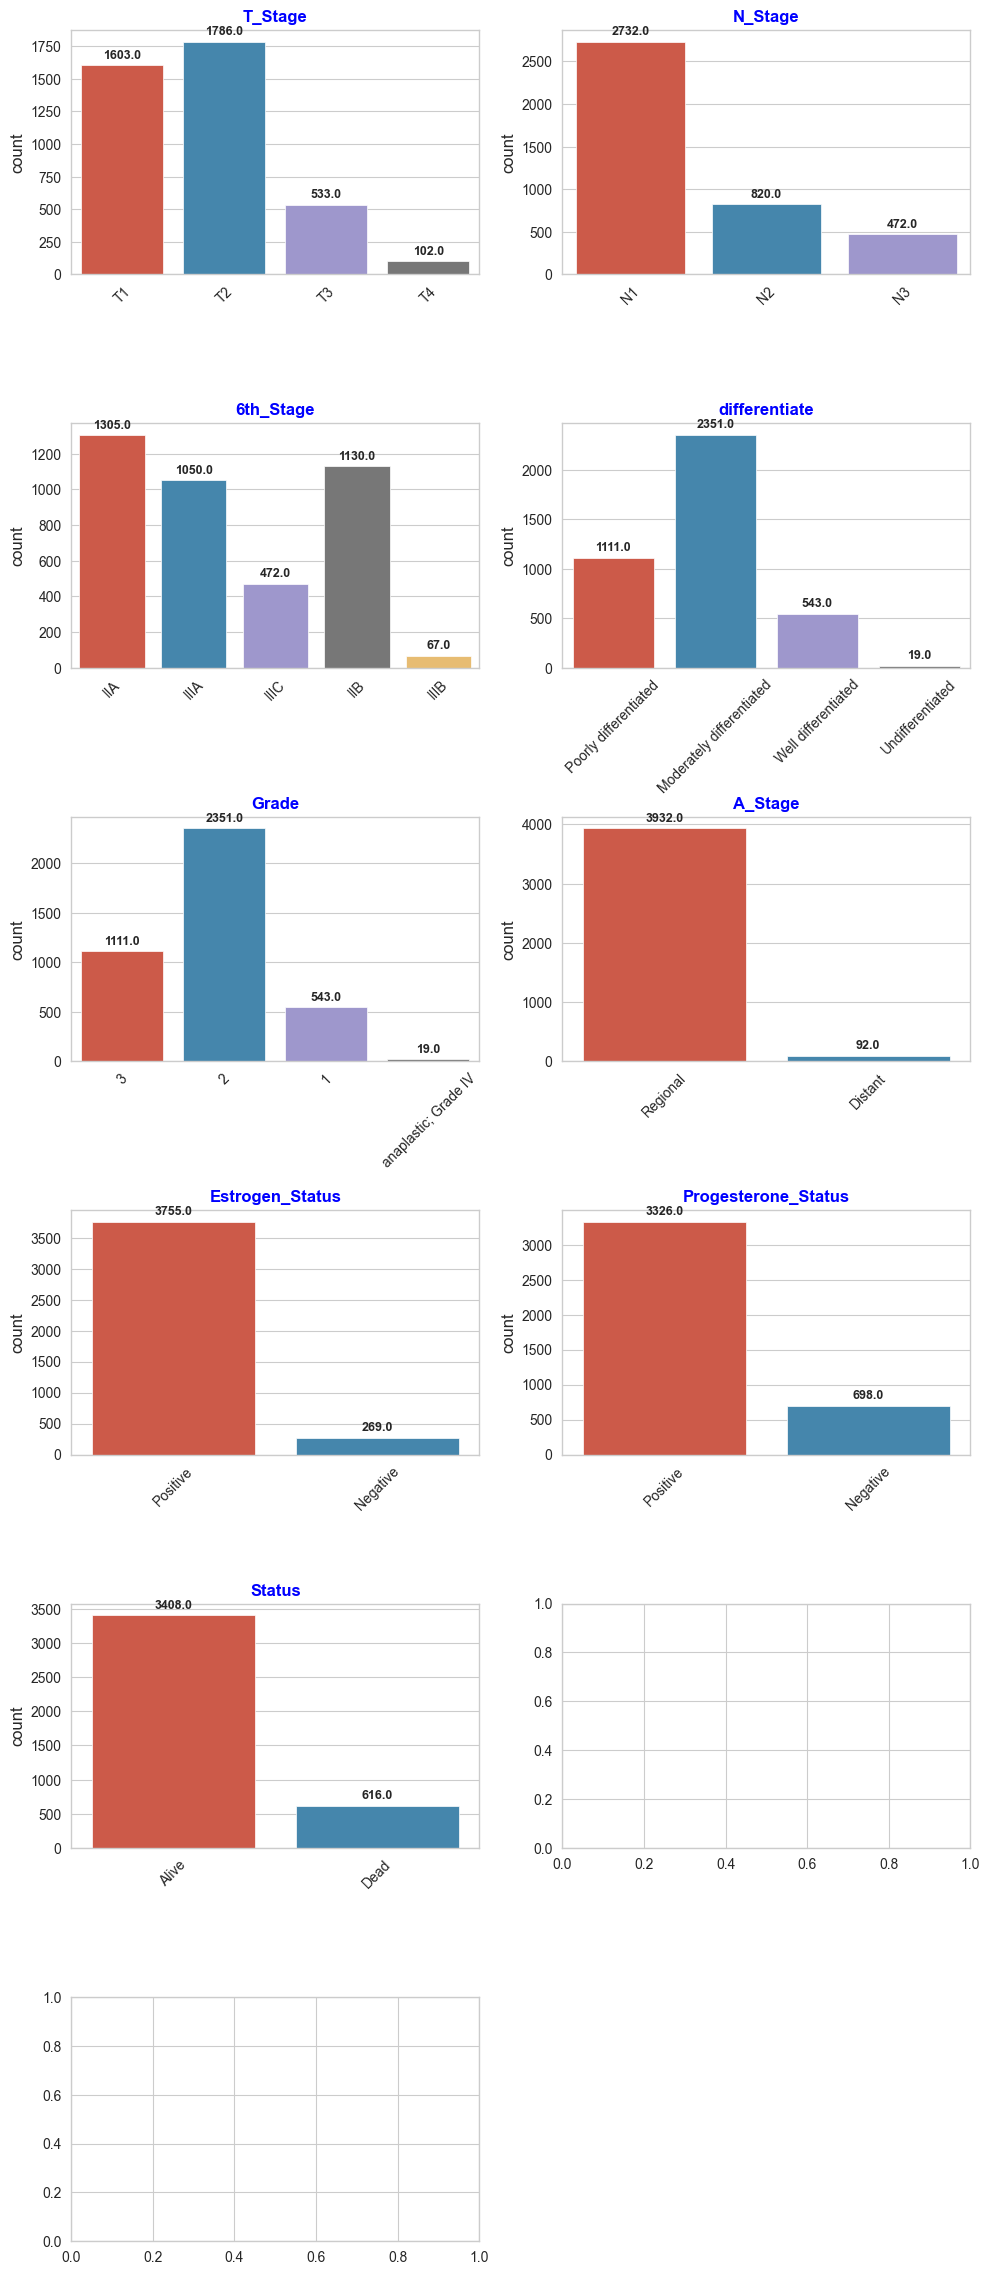

In [142]:
#EDA
#visualize the values that each categorical
fig , ax = plt.subplots(6,2,figsize = (10,25))
ax = ax.flat
for i,cat_col in enumerate(cat_cols):
    rects = sns.countplot(df, x = cat_col, ax = ax[i])
    for rect in rects.patches:
        height = rect.get_height()
        ax[i].annotate(f'{height}', (rect.get_x() + rect.get_width() / 2, height-2),
                  xytext=(0, 3),  
                  textcoords="offset points",
                  size = 9,
                  ha='center',
                  va='bottom',
                  weight = 'bold'

                      )  
    ax[i].set_title(f'{cat_col}', fontsize = 12, fontweight = 'bold', color = 'blue')
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
   
fig.delaxes(ax[11])
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

C:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

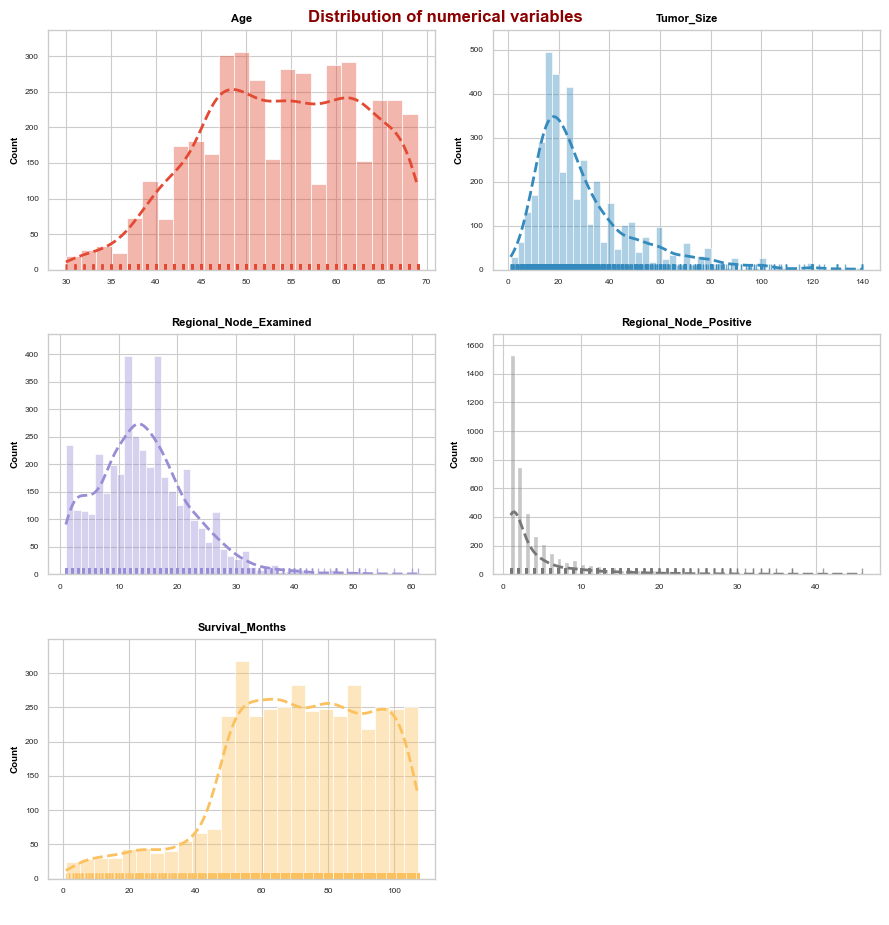

In [143]:
#visualize the numeric variables
fig,axes = plt.subplots(nrows = 3, ncols = 2, figsize = (9, 10))
axes = axes.flat
data=df
color_cycle = list(plt.rcParams['axes.prop_cycle'])
num_colors = len(color_cycle)

for i, num_col in enumerate(num_cols):
    sns.histplot(data,
               x = num_col,
               stat = 'count',
               kde = True,
               color = color_cycle[i % num_colors]["color"],
               line_kws = {'linewidth': 2,
                           'linestyle':'dashed'},
               alpha = 0.4,
               ax = axes[i])
    sns.rugplot(data,
              x = num_col,
              color = color_cycle[i % num_colors]["color"],
              ax = axes[i], alpha = 0.7)
    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
    axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
    axes[i].tick_params(labelsize = 6)
    
fig.delaxes(axes[5])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkred', y = 0.92)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_23736\1912841645.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


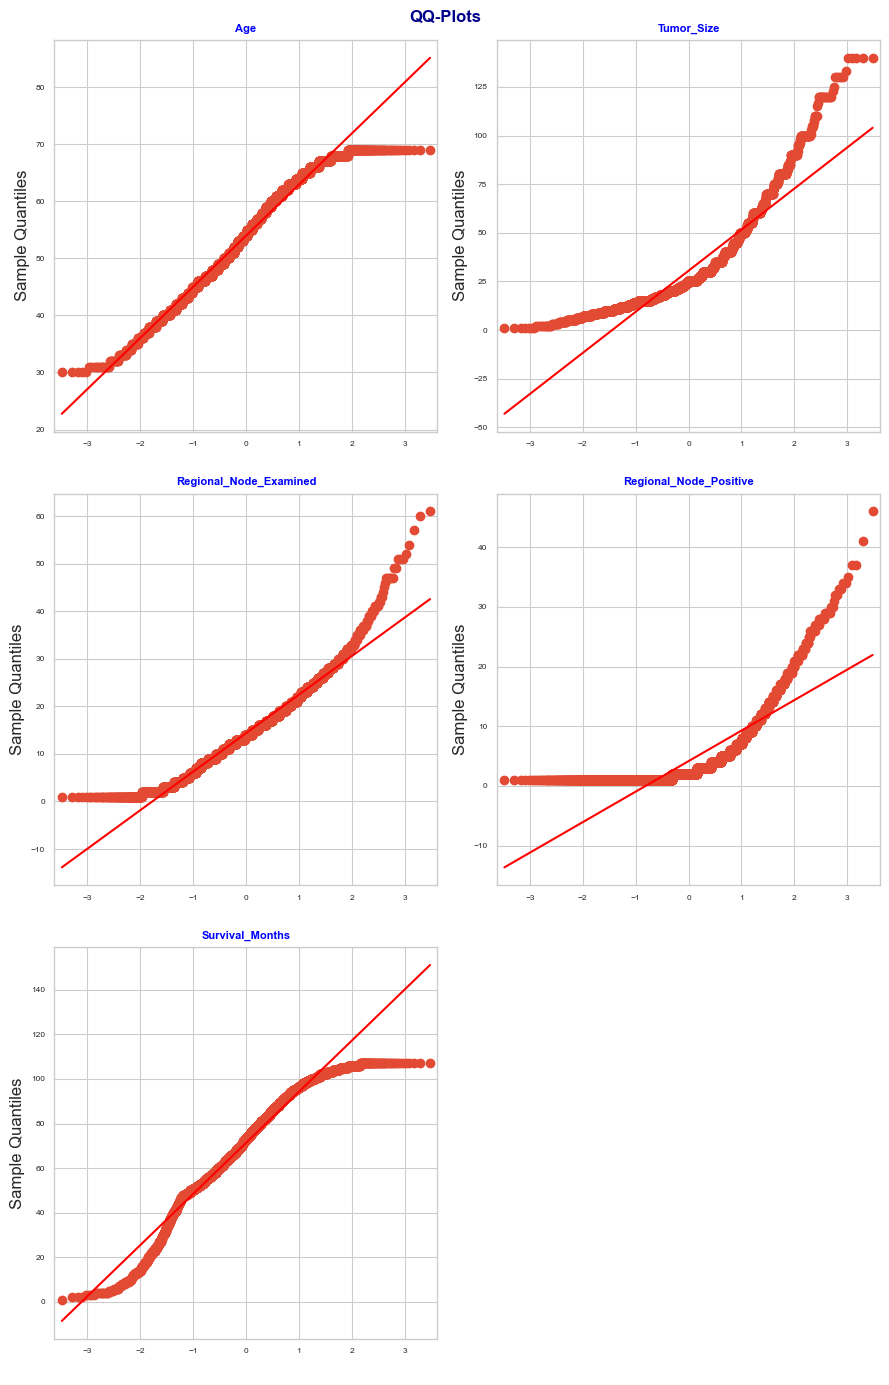

In [144]:
fig,axes = plt.subplots(3, 2, figsize = (9, 15))
axes = axes.flat

for i, num_col in enumerate(num_cols):
    qqplot(data[num_col], line = 's', ax = axes[i])

    axes[i].set_xlabel(" ")
    axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'blue')
    axes[i].tick_params(labelsize = 6)

fig.delaxes(axes[5])
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('QQ-Plots', fontsize = 12, fontweight = 'bold', color = 'darkblue', y = 0.92)
fig.show()

In [145]:
for i, num_col in enumerate(num_cols):
    p_value = shapiro(data[num_col])[1]
    value = 'No Normal Distribution' if p_value < 0.05 else 'Normal Distribution'
    print(f'{i}- {num_col}: p-value = {p_value}  ==>  {value}\n')

0- Age: p-value = 1.3937329454961893e-25  ==>  No Normal Distribution

1- Tumor_Size: p-value = 4.181089325318251e-53  ==>  No Normal Distribution

2- Regional_Node_Examined: p-value = 5.797631565286333e-32  ==>  No Normal Distribution

3- Regional_Node_Positive: p-value = 1.3282196832808454e-67  ==>  No Normal Distribution

4- Survival_Months: p-value = 3.989289147122242e-31  ==>  No Normal Distribution



In [146]:
# Now we visualize the values that each categorical variable takes.
print('=====*'*10+'\n')
print(f"Total Categorical Variables = {len(cat_cols)} \n")
print("=====*"*10+'\n\n\n' )
i=1
for cat_col in cat_cols:
  print(f"{i}-  {cat_col} ==> {df[cat_col].unique()} ==> {df[cat_col].nunique()} unique values \n\n")
  i=i+1

=====*=====*=====*=====*=====*=====*=====*=====*=====*=====*

Total Categorical Variables = 9 

=====*=====*=====*=====*=====*=====*=====*=====*=====*=====*



1-  T_Stage ==> ['T1' 'T2' 'T3' 'T4'] ==> 4 unique values 


2-  N_Stage ==> ['N1' 'N2' 'N3'] ==> 3 unique values 


3-  6th_Stage ==> ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB'] ==> 5 unique values 


4-  differentiate ==> ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated'] ==> 4 unique values 


5-  Grade ==> ['3' '2' '1' ' anaplastic; Grade IV'] ==> 4 unique values 


6-  A_Stage ==> ['Regional' 'Distant'] ==> 2 unique values 


7-  Estrogen_Status ==> ['Positive' 'Negative'] ==> 2 unique values 


8-  Progesterone_Status ==> ['Positive' 'Negative'] ==> 2 unique values 


9-  Status ==> ['Alive' 'Dead'] ==> 2 unique values 




C:\Users\prana\AppData\Local\Temp\ipykernel_23736\3808690086.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


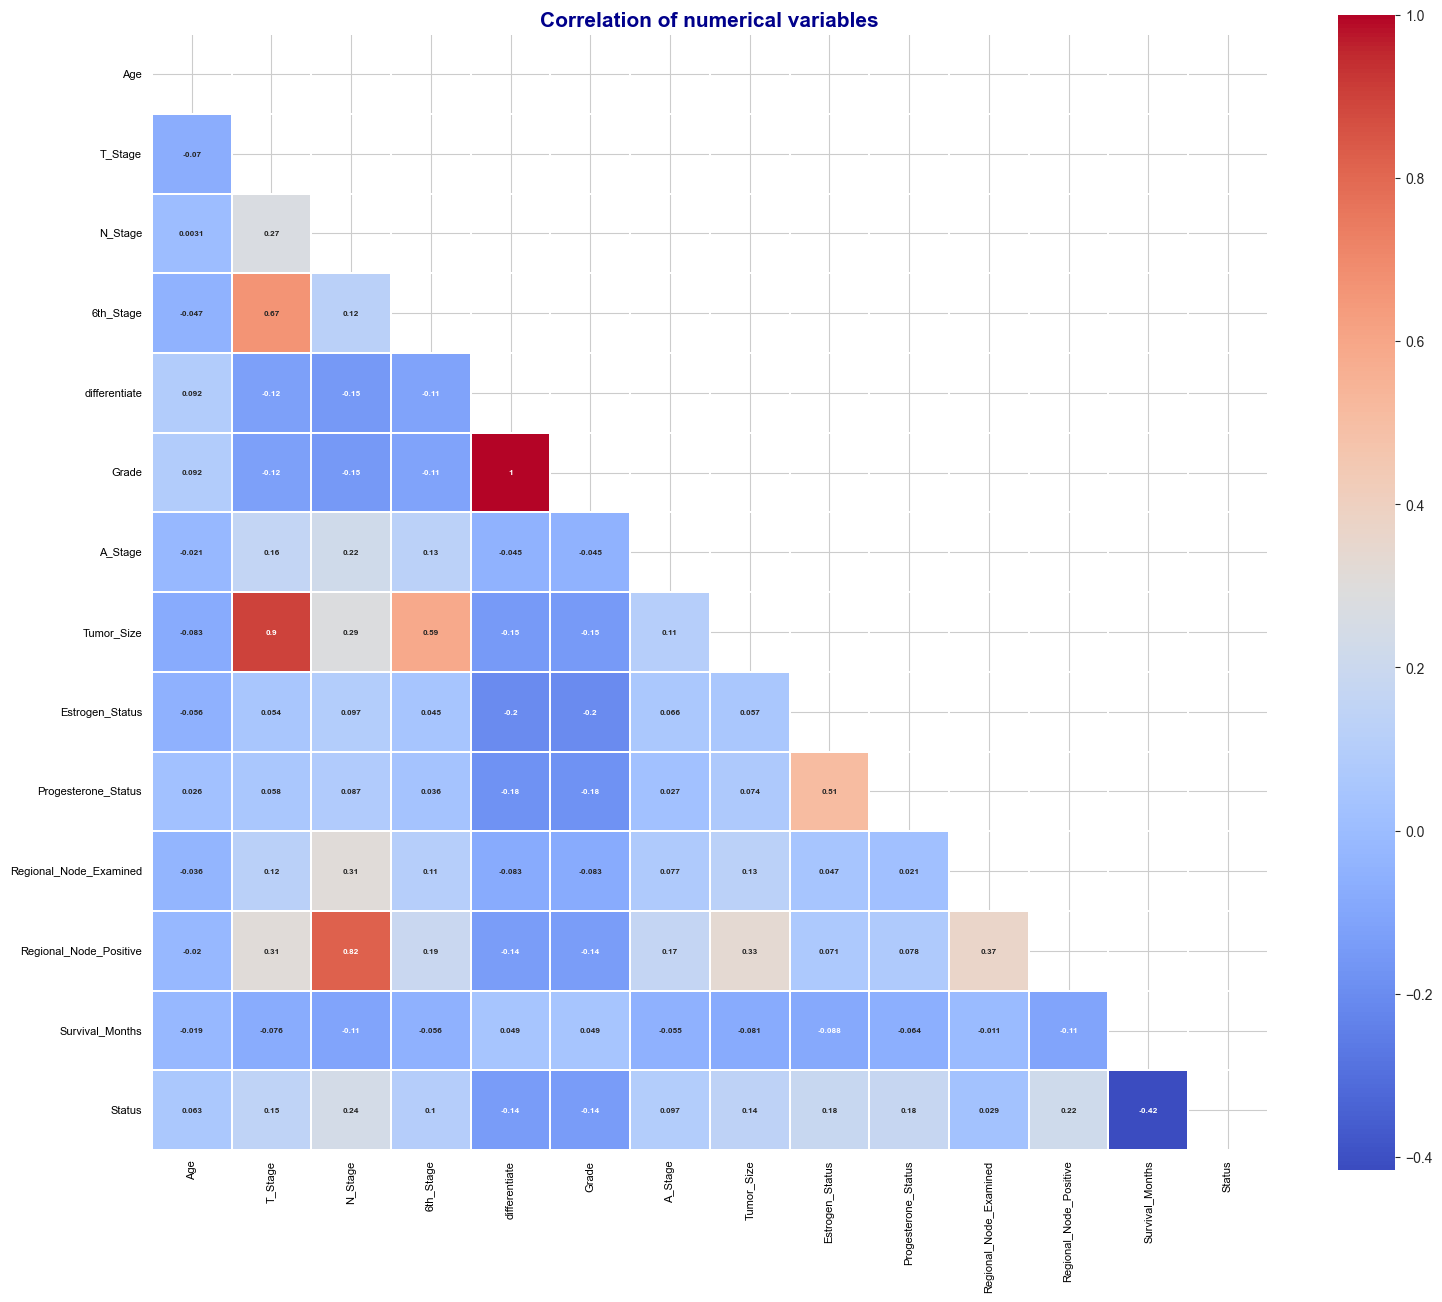

In [147]:
corr_matrix = SS.corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig,ax = plt.subplots(figsize=(18,15))
sns.heatmap(corr_matrix,
            mask = mask,
            square = True,
            annot = True,
            ax = ax,
            linewidths = 0.2,
            annot_kws = {'size':6, 'fontweight':'bold'},
            cmap='coolwarm')
ax.tick_params(labelsize=8, color = 'blue', labelcolor='black')
ax.set_title('Correlation of numerical variables',fontsize = 15,fontweight='bold', color = 'darkblue')
fig.show()

C:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-p

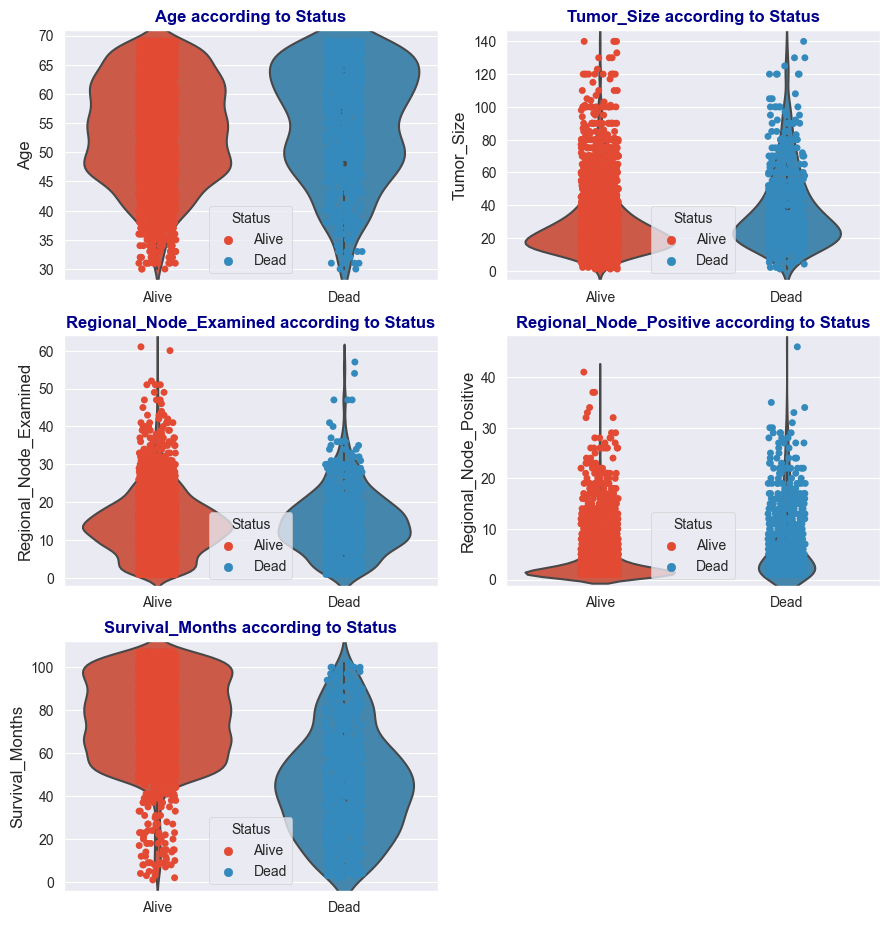

In [148]:
sns.set_style('darkgrid')

fig,ax = plt.subplots(3,2,figsize = (9,10))
ax = ax.flat

for i,num_col in enumerate(num_cols):
    sns.violinplot(df, x = cat_cols[-1], y = num_col, ax = ax[i])
    sns.stripplot(df, x = cat_cols[-1], y = num_col, hue = cat_cols[-1], ax = ax[i])

    ax[i].set_title(f'{num_col} according to {cat_cols[-1]}', fontsize = 12, fontweight = 'bold', color = 'darkblue')
    ax[i].set_xlabel('')


fig.delaxes(ax[5])
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_23736\1385221955.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


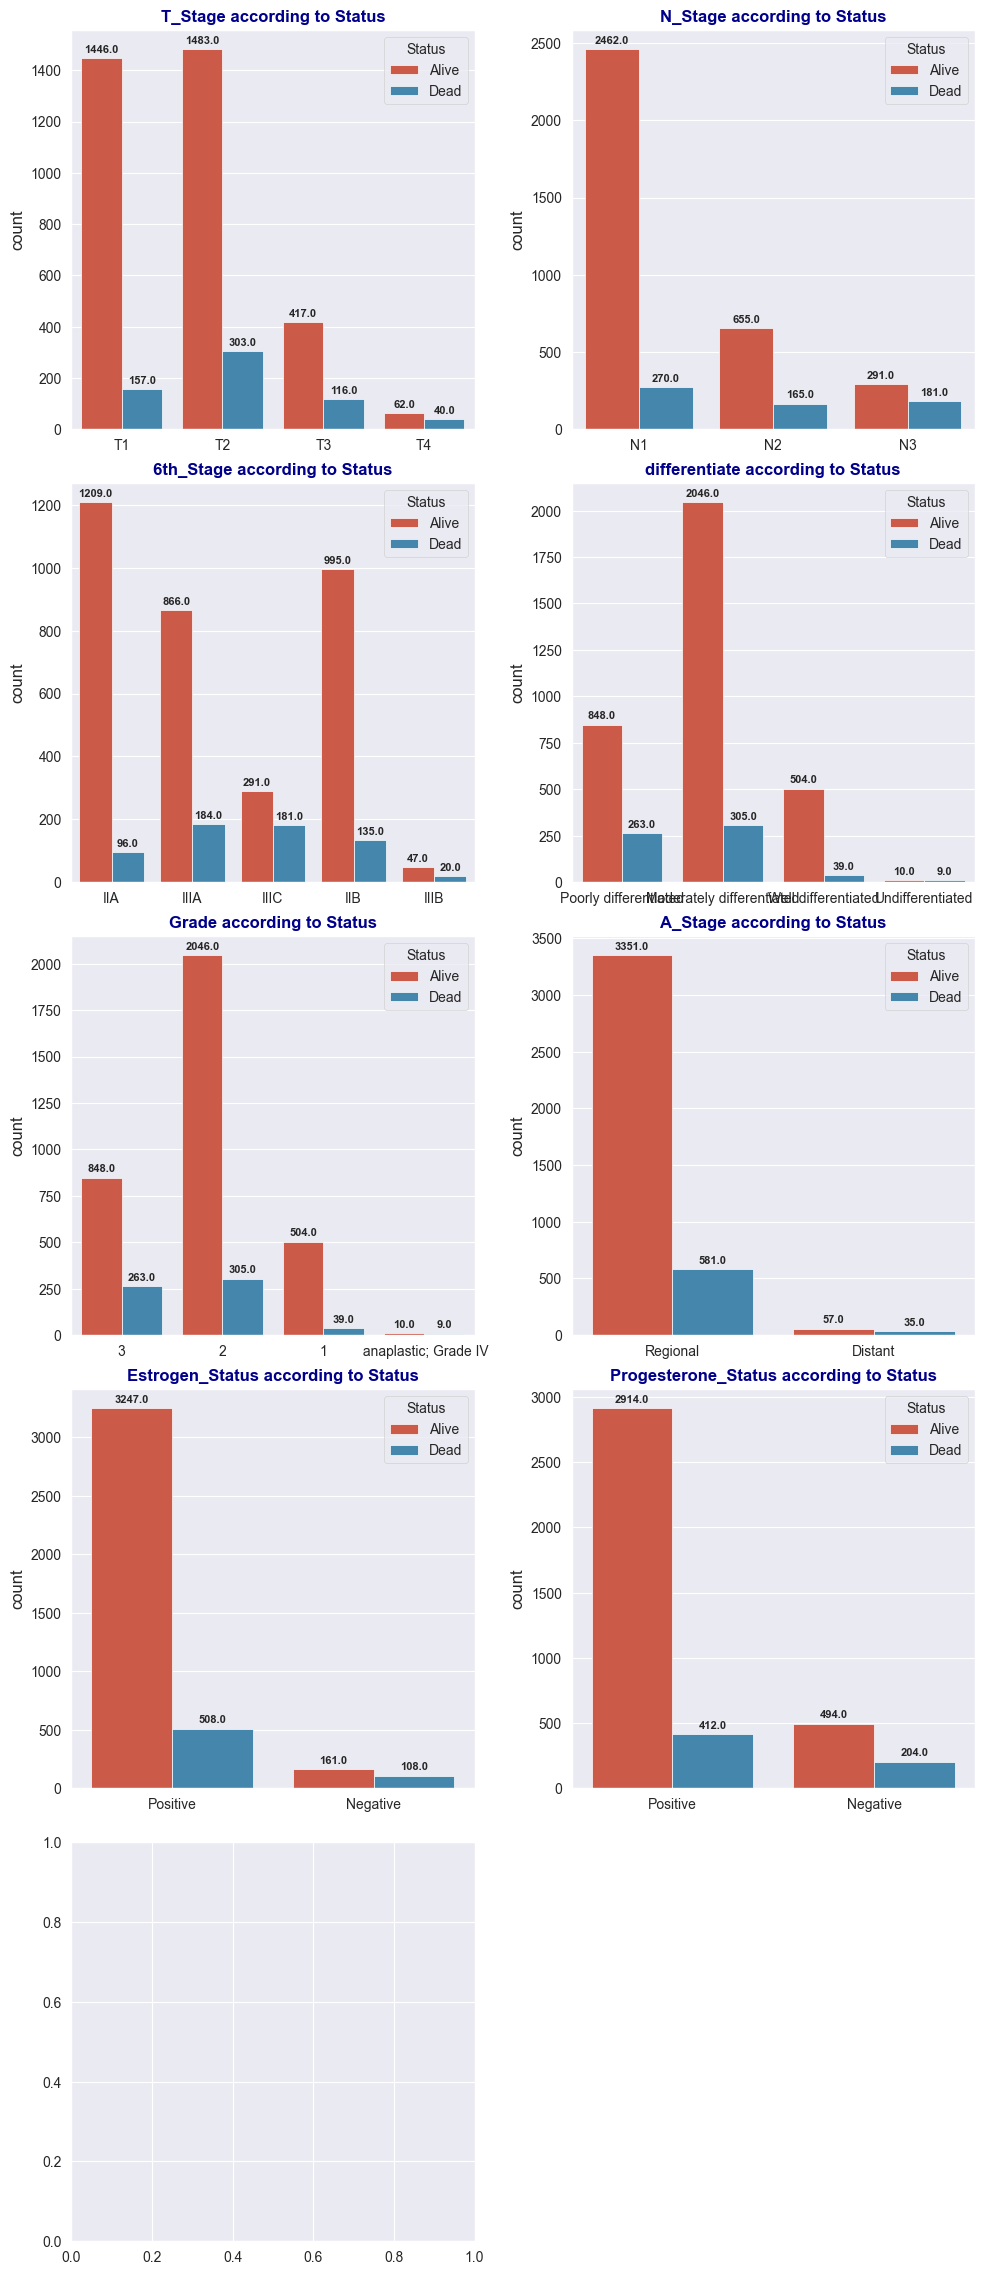

In [149]:
fig , ax = plt.subplots(5,2,figsize = (10,25))
ax = ax.flat

for i,j in enumerate(cat_cols[:-1]):
    rects = sns.countplot(df, x = j, hue = cat_cols[-1], ax = ax[i])


    for rect in rects.patches:
        height = rect.get_height()
        ax[i].annotate(f'{height}', (rect.get_x() + rect.get_width() / 2, height-2),
                  xytext=(0, 3),  
                  textcoords="offset points",
                  size = 8,
                  ha='center',
                  va='bottom',
                  weight = 'bold')
    ax[i].set_title(f'{j} according to {cat_cols[-1]}', fontsize = 12, fontweight = 'bold', color = 'darkblue')
    ax[i].set_xlabel('')
    
fig.delaxes(ax[9])
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

In [150]:
#Data Splite and Feature Scaling
X= SS.iloc[:,1 :-1].values
y = SS.iloc[:, -1].values

In [151]:
cat_cols.remove('Status')
cat_cols

['T_Stage',
 'N_Stage',
 '6th_Stage',
 'differentiate',
 'Grade',
 'A_Stage',
 'Estrogen_Status',
 'Progesterone_Status']

In [152]:
X= (X - np.min(X))/(np.max(X)- np.min(X))

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.90,random_state=1)

In [154]:
skf = StratifiedKFold(n_splits = 5,
                      shuffle = True,
                      random_state = 123)

In [155]:
#ML algorithms
def plot_metrics(metrics_train:dict, metrics_test:dict, metrics:list)->None:


    df_metrics = pd.DataFrame(index = metrics,
                              data = {'Train':[metrics_train[metric] for metric in metrics],
                                      'Test':[metrics_test[metric] for metric in metrics]})


    n = len(df_metrics.index)
    x = np.arange(n)


    width = 0.25

    fig,ax = plt.subplots(figsize=(6,4))

    rects1 = ax.bar(x-width, df_metrics.Train, width=width, label='Train',linewidth=1.6,edgecolor='black',color='blue')

    rects2 = ax.bar(x, df_metrics.Test, width=width, label='Test',linewidth=1.6, edgecolor='black', color = 'red')

    ax.set_title('Metrics',fontsize=12, fontweight='bold')
    ax.set_ylabel('Score',fontsize=10, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(x-0.13)
    ax.set_xticklabels(df_metrics.index, fontsize=10, fontweight='bold')
    ax.legend()

    def autolabel(rects):

        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', size = 7, weight = 'bold')

    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    fig.show()

In [156]:
#SVM
svm = SVC(kernel='rbf' ,random_state = 123)

cv_results_svm = cross_validate(estimator = svm,
                                X = X,
                                y = y,
                                scoring = ['accuracy', 'precision', 'recall', 'f1'],
                                cv = skf,
                                verbose = 1,
                                return_train_score = True,
                                error_score = 'raise')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


C:\Users\prana\AppData\Local\Temp\ipykernel_23736\2419851700.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results_svm['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
C:\Users\prana\AppData\Local\Temp\ipykernel_23736\2419851700.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results_svm['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
C:\Users\prana\AppData\Local\Temp\ipykernel_23736\2419851700.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


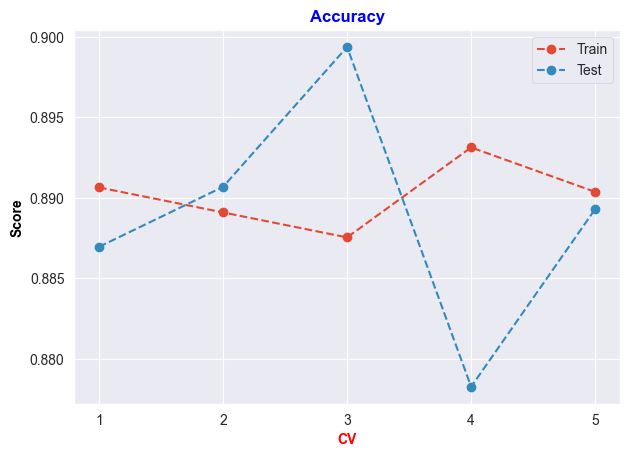

In [157]:
fig,axes = plt.subplots()


axes.plot(np.arange(1,6,1),cv_results_svm['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
axes.plot(np.arange(1,6,1),cv_results_svm['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
axes.set_xticks(np.arange(1,6,1))
axes.set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'red')
axes.set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes.set_title('Accuracy', fontsize = 12, fontweight = 'bold', color = 'blue')
axes.legend()



fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_23736\1406984282.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


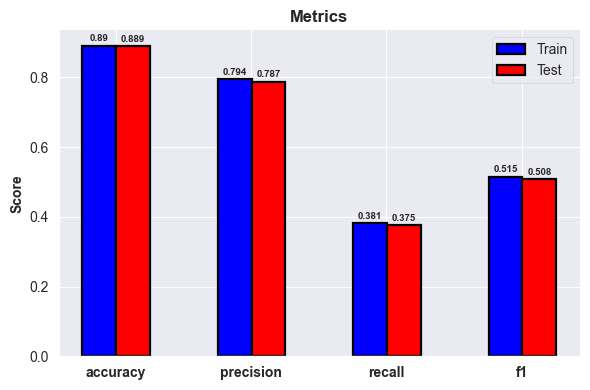

In [158]:
metrics_train_svm = {'accuracy':round(cv_results_svm['train_accuracy'].mean(), 3),
                'precision':round(cv_results_svm['train_precision'].mean(), 3),
                'recall':round(cv_results_svm['train_recall'].mean(), 3),
                'f1':round(cv_results_svm['train_f1'].mean(), 3)}

metrics_test_svm = {'accuracy':round(cv_results_svm['test_accuracy'].mean(), 3),
                'precision':round(cv_results_svm['test_precision'].mean(), 3),
                'recall':round(cv_results_svm['test_recall'].mean(), 3),
                'f1':round(cv_results_svm['test_f1'].mean(), 3)}

plot_metrics(metrics_train_svm, metrics_test_svm, ['accuracy', 'precision', 
                                                   'recall', 'f1'])

In [159]:
#RandomForest
rf = RandomForestClassifier(random_state = 123)

cv_results_rf = cross_validate(estimator = rf,
                               X = X,
                               y = y,
                               scoring = ['accuracy', 'precision', 'recall', 'f1'],
                               cv = skf,
                               verbose = 1,
                               return_train_score = True,
                               error_score = 'raise')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


C:\Users\prana\AppData\Local\Temp\ipykernel_23736\1301505154.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results_rf['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train', color = 'black')
C:\Users\prana\AppData\Local\Temp\ipykernel_23736\1301505154.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results_rf['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
C:\Users\prana\AppData\Local\Temp\ipykernel_23736\1301505154.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


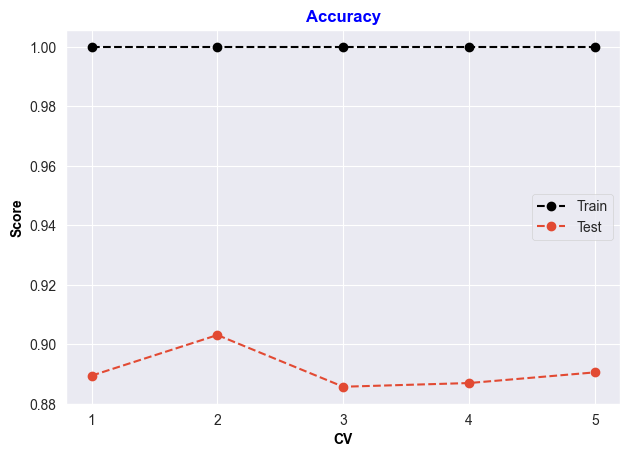

In [160]:
fig,axes = plt.subplots()


axes.plot(np.arange(1,6,1),cv_results_rf['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train', color = 'black')
axes.plot(np.arange(1,6,1),cv_results_rf['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
axes.set_xticks(np.arange(1,6,1))
axes.set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes.set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes.set_title('Accuracy', fontsize = 12, fontweight = 'bold', color = 'blue')
axes.legend()



fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_23736\1406984282.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


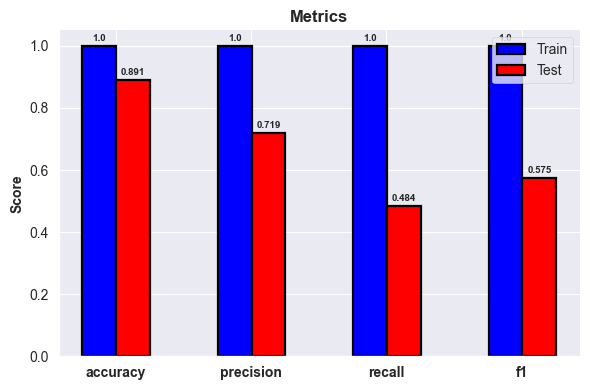

In [161]:
metrics_train_rf = {'accuracy':round(cv_results_rf['train_accuracy'].mean(), 3),
                'precision':round(cv_results_rf['train_precision'].mean(), 3),
                'recall':round(cv_results_rf['train_recall'].mean(), 3),
                'f1':round(cv_results_rf['train_f1'].mean(), 3)}

metrics_test_rf = {'accuracy':round(cv_results_rf['test_accuracy'].mean(), 3),
                'precision':round(cv_results_rf['test_precision'].mean(), 3),
                'recall':round(cv_results_rf['test_recall'].mean(), 3),
                'f1':round(cv_results_rf['test_f1'].mean(), 3)}

plot_metrics(metrics_train_rf, metrics_test_rf, ['accuracy', 'precision', 'recall', 'f1'])

In [162]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)

cv_results_knn = cross_validate(estimator = knn,
                                X = X,
                                y = y,
                                scoring = ['accuracy', 'precision', 'recall', 'f1'],
                                cv = skf,
                                verbose = 1,
                                return_train_score = True,
                                error_score = 'raise')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


C:\Users\prana\AppData\Local\Temp\ipykernel_23736\3753222582.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results_knn['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
C:\Users\prana\AppData\Local\Temp\ipykernel_23736\3753222582.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(np.arange(1,6,1),cv_results_knn['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
C:\Users\prana\AppData\Local\Temp\ipykernel_23736\3753222582.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


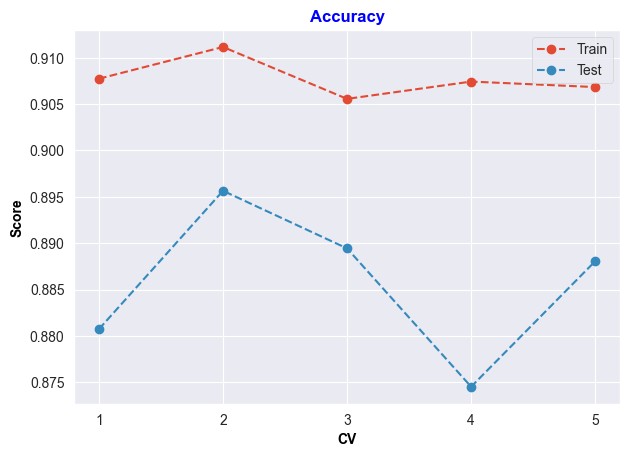

In [163]:
fig,axes = plt.subplots()


axes.plot(np.arange(1,6,1),cv_results_knn['train_accuracy'], '-o', linestyle = 'dashed', label = 'Train')
axes.plot(np.arange(1,6,1),cv_results_knn['test_accuracy'], '-o', linestyle = 'dashed', label = 'Test')
axes.set_xticks(np.arange(1,6,1))
axes.set_xlabel('CV', fontsize = 10, fontweight = 'bold', color = 'black')
axes.set_ylabel('Score', fontsize = 10, fontweight = 'bold', color = 'black')
axes.set_title('Accuracy', fontsize = 12, fontweight = 'bold', color = 'blue')
axes.legend()



fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_23736\1406984282.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


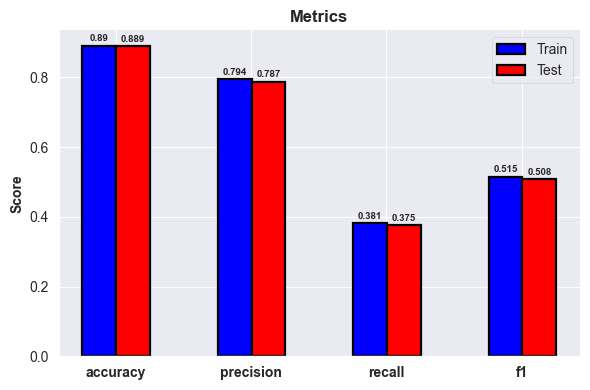

In [164]:
metrics_train_knn = {'accuracy':round(cv_results_svm['train_accuracy'].mean(), 3),
                'precision':round(cv_results_svm['train_precision'].mean(), 3),
                'recall':round(cv_results_svm['train_recall'].mean(), 3),
                'f1':round(cv_results_svm['train_f1'].mean(), 3)}

metrics_test_knn = {'accuracy':round(cv_results_svm['test_accuracy'].mean(), 3),
                'precision':round(cv_results_svm['test_precision'].mean(), 3),
                'recall':round(cv_results_svm['test_recall'].mean(), 3),
                'f1':round(cv_results_svm['test_f1'].mean(), 3)}

plot_metrics(metrics_train_knn, metrics_test_knn, ['accuracy', 'precision', 
                                                   'recall', 'f1'])

C:\Users\prana\AppData\Local\Temp\ipykernel_23736\524371794.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


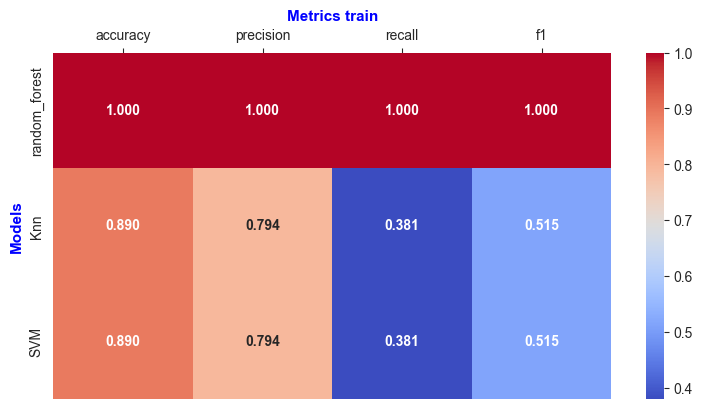

In [165]:
#Compare Models
# We create a dictionary that stores the names of the models and their respective metrics.
models_name = {'random_forest':metrics_train_rf,
               'Knn' :metrics_train_knn,
               'SVM':metrics_train_svm}

df_train_metrics = pd.DataFrame.from_dict(models_name,orient='index')
# We order from highest to lowest by the f1 score metric, which is the one we chose because we have unbalanced classes.
df_train_metrics = df_train_metrics.sort_values('recall', ascending = False)

# we visualize the training metrics
fig,ax = plt.subplots(figsize=(9,4.5))
sns.heatmap(df_train_metrics, annot=True, cmap = 'coolwarm', annot_kws = {'fontweight':'bold'},fmt = '.3f', ax = ax)
ax.xaxis.tick_top()
ax.set_ylabel('Models', fontsize = 11, fontweight = 'bold', color = 'blue')
ax.set_title('Metrics train', fontsize = 11, fontweight = 'bold', color = 'blue')
fig.show()

In [166]:
#ANN (Artificial Neural Network)
#ANN with Tensorflow
input_shape = [X_train.shape[1]]
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu'),
    layers.BatchNormalization(),
   
    layers.Dense(1, activation='sigmoid')
])



model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

info = model.fit(X_train,y_train, epochs=50, validation_split=0.1, batch_size=32)

Epoch 1/50
12/12 [==============================] - 2s 24ms/step - loss: 0.6938 - accuracy: 0.5900 - val_loss: 0.6618 - val_accuracy: 0.7317
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6515 - accuracy: 0.6565 - val_loss: 0.6529 - val_accuracy: 0.7317
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6170 - accuracy: 0.6898 - val_loss: 0.6438 - val_accuracy: 0.7317
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6004 - accuracy: 0.7285 - val_loss: 0.6358 - val_accuracy: 0.7317
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5859 - accuracy: 0.7285 - val_loss: 0.6304 - val_accuracy: 0.7317
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5756 - accuracy: 0.7452 - val_loss: 0.6242 - val_accuracy: 0.7317
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5524 - accuracy: 0.7978 - val_loss: 0.6188 - val_accuracy: 0.7317
Epoch 8/50
12/12 [=

91/91 - 0s - loss: 0.3125 - accuracy: 0.8915 - 158ms/epoch - 2ms/step
Test accuracy: 0.8914964199066162


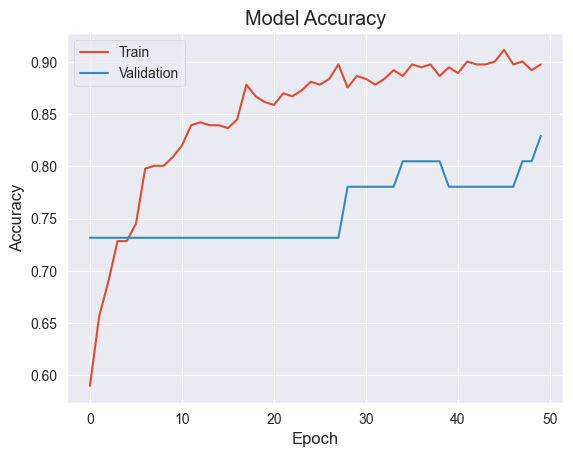

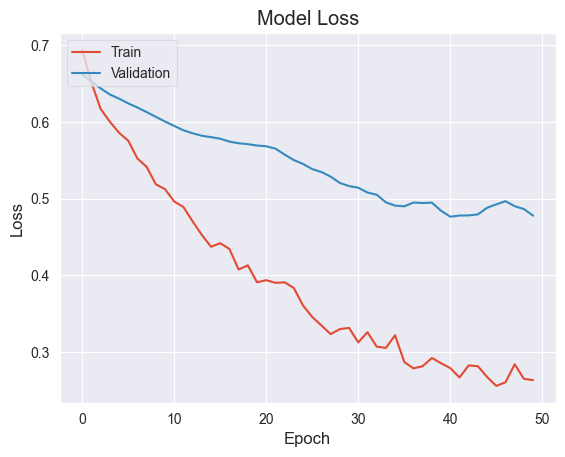

114/114 [==============================] - 0s 2ms/step


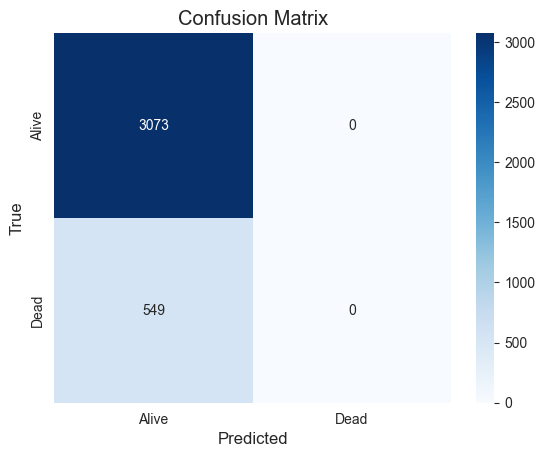

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Bat  (None, 12)                48        
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 16)                208       
                                                                 
 batch_normalization_7 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_8 (Bat  (None, 8)                 32        
 chNormalization)                                                
                                                      

In [167]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=40)

print('Test accuracy:', test_acc)

plt.plot(info.history['accuracy'])
plt.plot(info.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


conf_matrix = confusion_matrix(y_test, y_pred_classes)
# plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
model.summary()

In [187]:
#ANN-from scratch
#Building a neural network

s = []
class NeuralNetwork:
      
    def __init__(self,input_size, hidden_size, output_size, lr):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = lr
      
        self.W1 = np.random.uniform(-2.4/self.input_size, 2.4/self.input_size, (self.input_size, self.hidden_size))
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.uniform(-2.4/self.hidden_size, 2.4/self.hidden_size, (self.hidden_size, self.output_size))
        self.b2 = np.zeros((1, self.output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def backward(self, X, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        self.z1_error = self.output_delta.dot(self.W2.T)
        self.z1_delta = self.z1_error * self.sigmoid_derivative(self.a1)
        
        self.W1 += X.T.dot(self.z1_delta) * self.lr
        self.b1 += np.sum(self.z1_delta, axis=0, keepdims=True) * self.lr
        
        self.W2 += self.a1.T.dot(self.output_delta) * self.lr
        self.b2 += np.sum(self.output_delta, axis=0, keepdims=True) * self.lr
    
    def train(self, X, y):
        output = self.forward(X)
        self.backward(X, y, output)
    
    def predict(self, X):
        return self.forward(X)

In [188]:
def calculate_cost(AL,Y):
    m = Y.shape[0]
    cost = -(1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    return cost

def plt_cost(index,cost_list2):

    plt.plot(index, cost_list2)
    plt.xticks(index, rotation ="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
def accuracy_cal(out,y_test,th):
    result = np.abs(out - y_test)
    correct=result[result <= th].size
    incorrect= result[result>th].size
    accuracy=correct/(correct+incorrect)*100
    return accuracy

In [189]:
#Traning a neural network
def traning(x_train,y_train,x_test,y_test,num_hid,num_out,lr, epochs):
    index = []
    cost_list2 = []
    accuracy = []
    b =int(x_train.shape[1])
    nn = NeuralNetwork(b,num_hid,num_out ,lr )
    
    for i in range(epochs):
        for m in range(1,x_train.shape[0]):
            nn.train(x_train[m-1:m], y_train[m-1:m])
            cost =calculate_cost(nn.forward(x_train[m-1:m]),y_train[m-1:m])
        cost = float(np.squeeze(cost))
        if i % 10 == 0:
            index.append(i)
            cost_list2.append(cost)
            print("Cost after iteration", i, ":", cost)
    plt_cost(index, cost_list2)
    y_pred = nn.predict(x_test)
    accuracy_test =  accuracy_cal(y_test, y_pred,0.5)
    print("Accuracy testing:", accuracy_test)
    s.append(accuracy_test/100)
    

In [190]:
def model3():
    num_hid=8
    num_out=1
    lr=0.001
    epochs =50

    print("traning with cost intropy")
    traning(X_train,y_train,X_test,y_test,num_hid,num_out,lr, epochs)

traning with cost intropy
Cost after iteration 0 : 0.9643166173074973
Cost after iteration 10 : 0.48781297611148444
Cost after iteration 20 : 0.3408540945141785
Cost after iteration 30 : 0.27990968159791946
Cost after iteration 40 : 0.24791530912889384


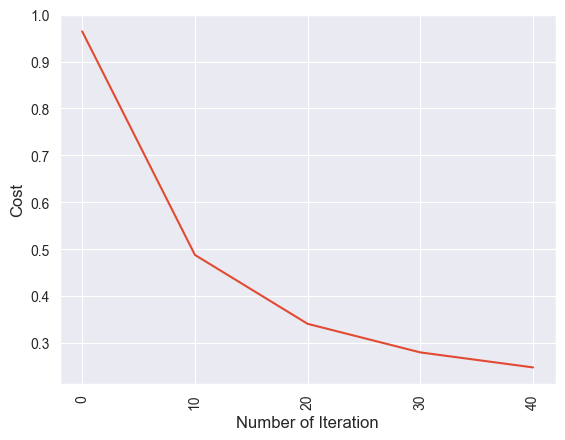

Accuracy testing: 84.84262838210933


In [191]:
model3()

In [192]:


s.append(cv_results_svm['test_accuracy'][4])
s.append(cv_results_rf['test_accuracy'][4])
s.append(cv_results_knn['test_accuracy'][4])
print(s)

print(max(s))

for i in range (0,3):
    if max(s) == s[i]:
        if i == 0:
            print("ANN")
        elif i == 1:
            print("svm")
        elif i == 2:
            print("Random Forest")
        elif i == 3:
            print("knn")


[0.8484262838210932, 0.8893034825870647, 0.8905472636815921, 0.8880597014925373]
0.8905472636815921
Random Forest
